In [63]:
# import dependencies
import requests
# Data Cleaning
import pandas as pd 
import openpyxl
# SQL Datbase Adapter and ORM
%pip install psycopg2
from sqlalchemy import create_engine, text
# Visualizations
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit
from scipy import stats

Note: you may need to restart the kernel to use updated packages.


In [2]:
#format list for the dataframe
key = '6924a24c5e8fd68ab4c75b8911dde245'
state_ids = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL',
             'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
             'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE',
             'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
             'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
             'VA', 'WA', 'WI', 'WV', 'WY']

In [103]:
#create dataframe and read in the two json files holding personal expenditures and personal income per capita
for x in state_ids:
  RINCPC = f"https://api.stlouisfed.org/fred/series/observations?series_id={x}RPIPC&api_key={key}&file_type=json"
  response = requests.get(RINCPC)
  series = pd.DataFrame(response.json()["observations"])
  series["value"] = series.rename(columns={'value': x}, inplace=True)
  series = series[['date', x]]
  if x == state_ids[0]:
    df = series
  else:
    df = pd.merge(df, series, on='date', how='inner')
df = df.set_index('date').T
df = df.reset_index()
df['Region/state of residence'] = df['index']
df = df.drop(columns='index')
states = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
          'FL': 'Florida','GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'kentucky',
          'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 
          'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska','NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 
          'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
          'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
          'VA': 'Virginia', 'WA': 'Washington', 'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'}
df = df.rename(columns= {'2008-01-01': '2008', '2009-01-01': '2009',  '2010-01-01': '2010', '2011-01-01': '2011', '2012-01-01': '2012', '2013-01-01': '2013',
         '2014-01-01': '2014', '2015-01-01': '2015',  '2016-01-01': '2016', '2017-01-01': '2017', '2018-01-01': '2018', '2019-01-01': '2019',
         '2020-01-01': '2020', '2021-01-01': '2021', '2022-01-01': '2022'})         
df = df.replace(states)


In [105]:
#print dataframe to csv - real income - has income per capita income per state
df.to_csv('../Data/realincome.csv', encoding='utf-8', index=False)

In [106]:
income_csv = pd.read_csv('../Data/realincome.csv')
income_csv

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Region/state of residence
0,42242,41995,41757,41849,41617,41356,42010,43835,43577,44472,46441,47123,50207,52290,50053,Alabama
1,51624,50046,53121,54738,55069,53511,55466,56504,54409,54005,55410,56881,58532,57623,58069,Alaska
2,38967,36641,37162,38384,39253,39171,40235,41903,42530,44250,45656,47219,50355,53694,50480,Arizona
3,40983,40970,40280,41286,43016,42407,44095,45429,45891,46835,48479,48268,51209,53390,52430,Arkansas
4,43801,42404,43519,44858,46170,45839,47491,50074,51845,52604,53481,55915,60011,63271,59103,California
5,46677,44290,44902,45642,46712,47730,50254,51326,50932,52739,56587,57850,59863,64282,63875,Colorado
6,61514,60539,63476,62986,62599,60177,62124,63350,64059,64665,68093,69110,70544,72206,67254,Connecticut
7,45923,45268,44779,47058,46587,46599,46908,49657,49888,50850,52109,52615,55233,55553,55709,Delaware
8,43264,41222,42760,43276,43193,42278,43817,45696,46131,48133,49932,52072,53888,57193,54746,Florida
9,42027,41967,40688,42371,41428,41342,42966,45162,45910,47164,48286,49770,52197,53954,50954,Georgia


In [17]:
cms_wb = openpyxl.load_workbook('../Data/Residence_all_tables.xlsx')
Ws = cms_wb.sheetnames

In [18]:
print(Ws)

['Contents', 'Table 1 Personal Health Care', 'Table 2 Hospital', 'Table 3 Physician and Clinics', 'Table 4 Other Professionals', 'Table 5 Dental', 'Table 6 Home Health', 'Table 7 Nursing', 'Table 8 Drugs and Non-durables', 'Table 9 Durables', 'Table 10 Other Health', 'Table 11 Personal Health Care', 'Table 12 Hospital', 'Table 13 Physician and Clinics', 'Table 14 Other Professionals', 'Table 15 Dental', 'Table 16 Home Health', 'Table 17 Nursing', 'Table 18 Drugs and Non-durables', 'Table 19 Durables', 'Table 20 Other Health', 'Table 21 Population', 'Table 22 Medicare', 'Table 23 Medicare Per Enrollee', 'Table 24 Medicare Enrollment', 'Table 25 Medicaid', 'Table 26 Medicaid Per Enrollee', 'Table 27 Medicaid Enrollment', 'Table 28 Private Health', 'Table 29 Private Per Enrollee', 'Table 30 Private Enrollment']


In [26]:

df2 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 11 Personal Health Care')
df3 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 12 Hospital')
df4 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 13 Physician and Clinics')
df5 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 16 Home Health')
df6 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 17 Nursing')
df7 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 23 Medicare Per Enrollee')
df8 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 26 Medicaid Per Enrollee')
df9 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 29 Private Per Enrollee')

name2 = 'Personal Health Care'
name3 = 'Hospital'
name4 = 'Physician and Clinics'
name5 = 'Home Health'
name6 = 'Nursing'
name7 = 'Medicare Per Enrollee'
name8 = 'Medicaid Per Enrollee'
name9 = 'Private Per Enrollee'

def clean(data):
    dat = data
    dat.columns = (dat.iloc[0])
    dat = dat.drop(62)
    dat = dat.drop(61)
    dat = dat.drop(0)
    dat = dat.rename(columns= {2008.0: 2008, 2009.0: 2009, 2010.0: 2010, 2011.0: 2011, 2012.0: 2012, 2013.0: 2013, 2014.0: 2014,
                           2015.0: 2015, 2016.0: 2016, 2017.0: 2017, 2018.0: 2018, 2019.0: 2019, 2020.0: 2020})
    dat = dat[['Region/state of residence', 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]]
    dat = dat.astype({2008: int, 2009: int, 2010: int, 2011: int, 2012: int, 2013: int, 2014: int,
                           2015: int, 2016: int, 2017: int, 2018: int, 2019: int, 2020: int})    
    if data.equals(df2):
        dat.to_csv(f'..\Data\{name2}.csv', encoding='utf-8', index=False)
    elif data.equals(df3):
        dat.to_csv(f'..\Data\{name3}.csv', encoding='utf-8', index=False)
    elif data.equals(df4):
        dat.to_csv(f'..\Data\{name4}.csv', encoding='utf-8', index=False)
    elif data.equals(df5):
        dat.to_csv(f'..\Data\{name5}.csv', encoding='utf-8', index=False)
    elif data.equals(df6):
        dat.to_csv(f'..\Data\{name6}.csv', encoding='utf-8', index=False)
    elif data.equals(df7):
        dat.to_csv(f'..\Data\{name7}.csv', encoding='utf-8', index=False)
    elif data.equals(df8):
        dat.to_csv(f'..\Data\{name8}.csv', encoding='utf-8', index=False)
    elif data.equals(df9):
        dat.to_csv(f'..\Data\{name9}.csv', encoding='utf-8', index=False)
    return dat

clean(df2), clean(df3), clean(df4), clean(df5), clean(df6), clean(df7), clean(df8), clean(df9)

(0  Region/state of residence   2008   2009   2010   2011   2012   2013   2014  \
 1              United States   6603   6866   7052   7236   7477   7611   7938   
 2                New England   8445   8869   9043   9226   9484   9660   9990   
 3                Connecticut   8195   8721   8831   8910   9229   9440   9831   
 4                      Maine   7924   8192   8342   8584   8753   8813   9115   
 5              Massachusetts   8974   9361   9533   9720   9952  10085  10394   
 6              New Hampshire   7583   8129   8445   8717   8960   9186   9367   
 7               Rhode Island   8048   8343   8460   8665   8859   9016   9484   
 8                    Vermont   7972   8464   8850   9209   9679  10247  10589   
 9                    Mideast   7699   8051   8313   8550   8735   8967   9375   
 10                  Delaware   8107   8385   8802   9202   9446   9768  10263   
 11      District of Columbia  10223  10701  11112  11537  11426  11583  11975   
 12             

Region/state of residence
Alabama            5073.615385
Alaska            10700.230769
Arizona            5949.846154
Arkansas           6301.615385
California         5920.230769
Colorado           7440.769231
Connecticut        8509.846154
Delaware           7053.692308
Florida            5200.000000
Georgia            4923.461538
Hawaii             5503.461538
Idaho              7157.846154
Illinois           5486.769231
Indiana            7183.307692
Iowa               6447.923077
Kansas             7437.538462
Kentucky           6784.846154
Louisiana          6283.230769
Maine              7891.153846
Maryland           7883.692308
Massachusetts     10336.692308
Michigan           5882.692308
Minnesota          9376.538462
Mississippi        6389.769231
Missouri           8766.384615
Montana            8283.307692
Nebraska           8134.769231
Nevada             5738.230769
New Hampshire      9274.384615
New Jersey         8988.076923
New Mexico         5453.307692
New York     

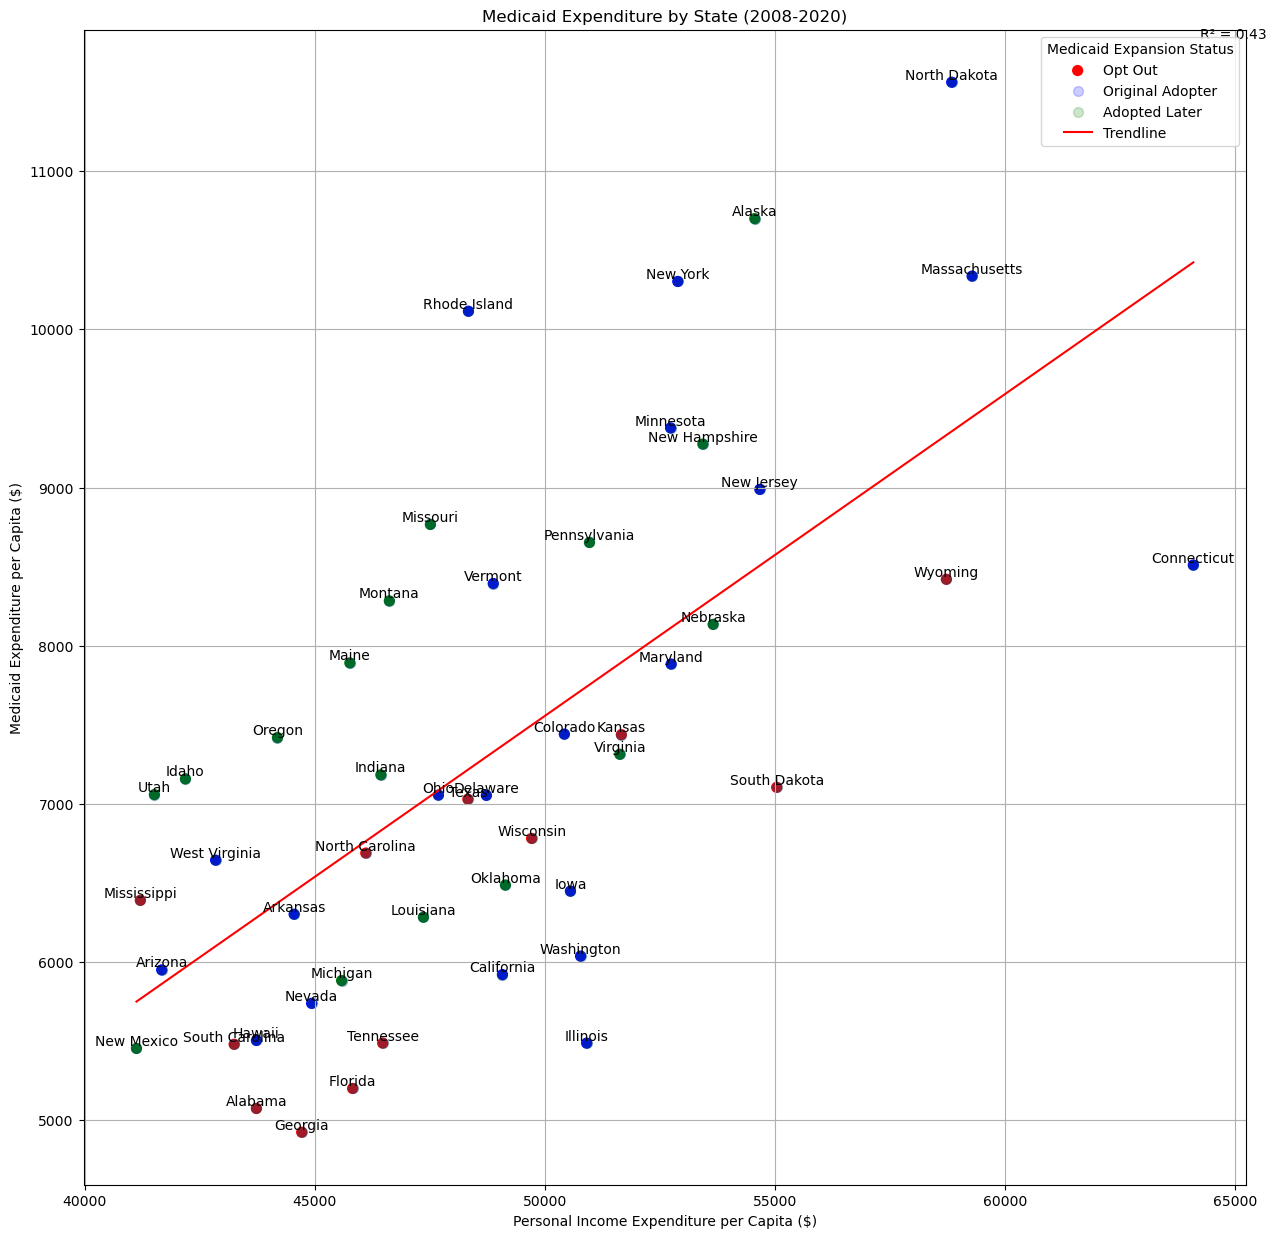

In [110]:
user = 'postgres' # Your username (try entering pgadmin to find)
password = 'Enter123' # Your Password
host = 'localhost'
port = '5432'
database_name = 'Healthcare_DB'

connection = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database_name}'
engine = create_engine(connection)
with engine.connect() as connection:
    query = text("SELECT * FROM income_per_capita;")
    query2 = text("SELECT * FROM medicaid;")
    print(df2)
    df2 = pd.read_sql(query2, connection)
    df = pd.read_sql(query, connection)

connection.close()

df2_mean = df2.drop(columns={'Region/state of residence'})
df2['medicaid'] = df2_mean.mean(axis=1)
df2.index = df2['Region/state of residence']
df2 = df2.drop(index={'New England', 'District of Columbia', 'Great Lakes', 'Mideast', 'United States', 'Southeast',
                     'Southwest', 'Rocky Mountains', 'Far West'})
df2 = df2.sort_index()
df2 = df2['medicaid']

df = df.drop(columns={'2021', '2022'})
df_mean = df.drop(columns={'Region/state of residence'})
df['income_per_capita'] = df_mean.mean(axis=1)
df.index = df['Region/state of residence']
df = df[['income_per_capita', '2020']]
df = df.merge(df2, on='Region/state of residence')
df = df.reset_index('Region/state of residence')
print(df.head())

opt_out = ['Wyoming', 'Texas', 'South Dakota', 'Wisconsin', 'Mississippi', 'Tennessee', 'Alabama', 'Georgia', 'North Carolina',
        'South Carolina', 'Kansas', 'Florida']
upon_adoption = ['Arizona',	'Arkansas',	'California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Iowa',
                 'Kentucky', 'Maryland', 'Massachusetts', 'Minnesota', 'Nevada', 'New Jersey', 'New York', 'North Dakota',
                 'Ohio', 'Rhode Island', 'Vermont', 'Washington', 'West Virginia']

colors_dict = {'Yes': 'red', 'No': 'blue', 'Adopters': 'green'}

plt.figure(figsize=(15, 15))
colors = [None] * len(df)
for i, row in df.iterrows():
    state = row['Region/state of residence']
    if state in opt_out:
        colors[i] = 'red'
        label = 'Opt Out'
    elif state in upon_adoption:
        colors[i] = 'blue'
        label2 = 'Original Adopter'
    else:
        colors[i] = 'green'
        label3 = 'Adopted Later'

plt.scatter(df['income_per_capita'], df['medicaid'], s=50, c=colors, alpha=1.0, label=label)
plt.scatter(df['income_per_capita'], df['medicaid'], s=50, c='blue', alpha=0.2, label=label2)
plt.scatter(df['income_per_capita'], df['medicaid'], s=50, c='green', alpha=0.2, label=label3)
m, b = polyfit(df['income_per_capita'], df['medicaid'], 1)
r, p = stats.pearsonr(df['income_per_capita'], df['medicaid'])
r_squared = r**2
x_trend = np.linspace(min(df['income_per_capita']), max(df['income_per_capita']), 100)
y_trend = m * x_trend + b
plt.plot(x_trend, y_trend, color='red', label='Trendline')
plt.annotate(f"R² = {r_squared:.2f}", xy=(0.8, 0.8), xycoords='figure fraction')


for i, (inc, home_health, region) in enumerate(zip(df['income_per_capita'], df['medicaid'], df['Region/state of residence'])):
    plt.text(inc, home_health + 0.1, region, ha='center', va='bottom', fontsize=10)

plt.xlabel('Personal Income Expenditure per Capita ($)')
plt.ylabel('Medicaid Expenditure per Capita ($)')
plt.title('Medicaid Expenditure by State (2008-2020)')
plt.legend(title='Medicaid Expansion Status')
plt.grid(True)
plt.show()

In [115]:
user = 'postgres'
password = 'Enter123' 
host = 'localhost'
port = '5432'
database_name = 'Healthcare_DB'

connection = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database_name}'
engine = create_engine(connection)
with engine.connect() as connection:
    query = text("SELECT * FROM personal_health_care_regions;")
    query2 = text("SELECT * FROM regional_averages_income;")
    df_average_income = pd.read_sql(query2, connection)
    df_healthcare_expen = pd.read_sql(query, connection)

with engine.connect() as connection:
    df_average_income = pd.read_sql(query2, connection)
    df_healthcare_expen = pd.read_sql(query, connection)
    
connection.close()

df_healthcare_expen.rename(columns={'Region/state of residence': 'Region'}, inplace=True)
df_average_income.rename(columns={'region': 'Region'}, inplace=True)

df_healthcare_expen

,Region,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,New England,8445.0,8869.0,9043.0,9226.0,9484.0,9660.0,9990.0,10516.0,10940.0,11221.0,11643.0,12123.0,12728.0
1,Mideast,7699.0,8051.0,8313.0,8550.0,8735.0,8967.0,9375.0,9840.0,10338.0,10797.0,11273.0,11836.0,12577.0
2,Great Lakes,6688.0,6997.0,7216.0,7393.0,7672.0,7806.0,8143.0,8481.0,8797.0,9050.0,9291.0,9754.0,10221.0
3,Plains,6849.0,7077.0,7291.0,7537.0,7794.0,7907.0,8192.0,8547.0,8852.0,9066.0,9381.0,9765.0,10285.0
4,Southeast,6299.0,6549.0,6670.0,6813.0,7066.0,7162.0,7506.0,7870.0,8144.0,8425.0,8655.0,9019.0,9480.0
5,Southwest,5808.0,6027.0,6169.0,6309.0,6513.0,6562.0,6871.0,7238.0,7446.0,7664.0,7838.0,8153.0,8587.0
6,Rocky Mountains,5605.0,5767.0,5883.0,6032.0,6229.0,6355.0,6645.0,6988.0,7237.0,7524.0,7866.0,8139.0,8497.0
7,Far West,6124.0,6318.0,6552.0,6784.0,7066.0,7245.0,7516.0,8005.0,8312.0,8566.0,8992.0,9501.0,10076.0


In [116]:
income_cost_percentage = pd.DataFrame()

for year in range(2008, 2021):
    income_cost_percentage[f'{year}'] = (df_healthcare_expen[f'{year}'] / df_average_income[f'{year}']) * 100

income_cost_percentage.insert(0, 'Region', df_healthcare_expen['Region'])

income_cost_percentage.sort_values(by='Region', inplace=True)

income_cost_percentage

,Region,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
7,Far West,14.096308,15.384990,15.776547,15.851949,16.178592,16.609734,16.647839,17.636432,18.611733,18.661496,18.775970,19.316865,19.546072
2,Great Lakes,13.622291,14.675840,14.847431,14.898934,15.284086,15.733779,16.107847,16.176162,16.513365,16.678646,16.817203,17.280232,17.323142
1,Mideast,17.138214,18.657737,19.061268,18.905055,18.978816,19.542760,19.953601,19.924675,20.770297,21.323617,21.977658,22.689543,22.547912
0,New England,18.717585,20.659213,20.456499,20.561164,20.710137,21.412422,21.329746,21.572167,22.084502,22.473463,22.770476,23.034391,22.906918
3,Plains,13.858481,14.454952,14.369051,14.615086,15.034722,15.593508,15.608566,15.960486,16.417218,16.601051,16.680299,16.762510,16.975589
6,Rocky Mountains,13.213107,13.737167,14.148969,14.313511,14.606636,15.099674,15.386575,15.655525,16.155821,16.340891,16.512375,16.640429,16.402525
4,Southeast,12.399362,13.522889,13.681209,13.192495,13.425293,13.815320,14.213217,14.572185,15.204242,15.493113,15.911389,16.357734,16.133973
5,Southwest,12.492741,13.789869,13.735138,13.743002,13.651226,13.850603,14.024452,14.475710,15.103142,15.113390,14.511321,14.787340,14.528382


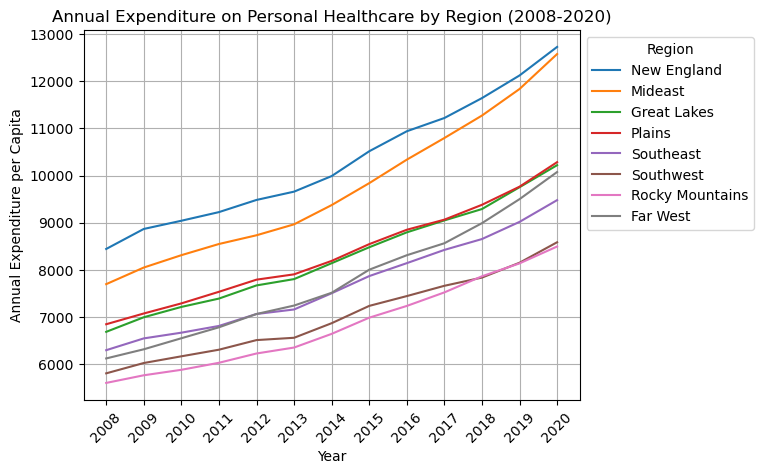

In [117]:
for region in df_healthcare_expen['Region']:
    plt.plot(df_healthcare_expen.columns[1:], df_healthcare_expen[df_healthcare_expen['Region'] == region].iloc[:, 1:].values.flatten(), label=region)

plt.title('Annual Expenditure on Personal Healthcare by Region (2008-2020)')
plt.xlabel('Year')
plt.ylabel('Annual Expenditure per Capita')
plt.xticks(df_healthcare_expen.columns[1:], rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

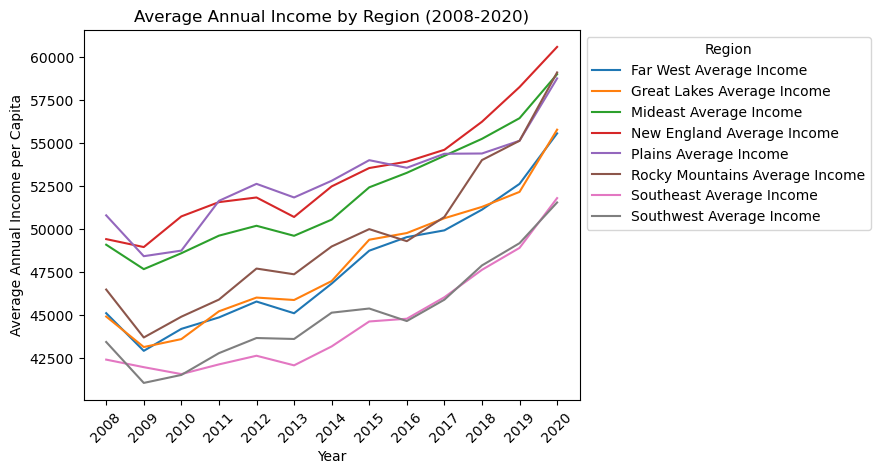

In [118]:
for region in df_average_income['Region']:
    plt.plot(df_average_income.columns[1:], df_average_income[df_average_income['Region'] == region].iloc[:, 1:].values.flatten(), label=region)

plt.title('Average Annual Income by Region (2008-2020)')
plt.xlabel('Year')
plt.ylabel('Average Annual Income per Capita')
plt.xticks(df_average_income.columns[1:], rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

C:\Users\3aama\AppData\Local\Temp\ipykernel_18636\267713371.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(income_cost_percentage.columns[1:], region[1][1:], label=region[1][0])


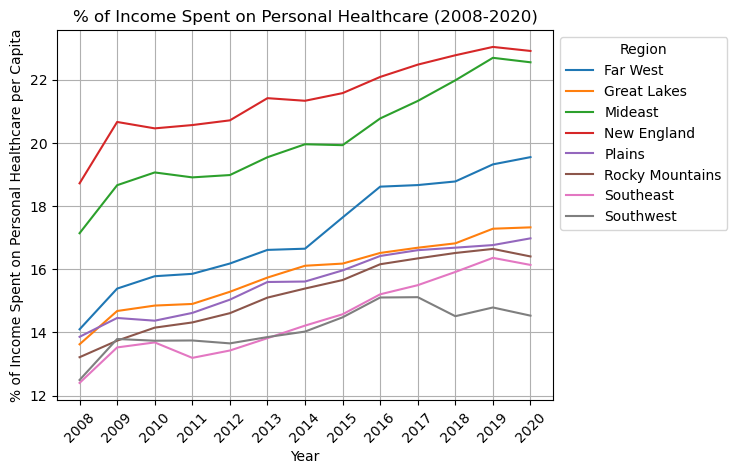

In [119]:
for region in income_cost_percentage.iterrows():
    plt.plot(income_cost_percentage.columns[1:], region[1][1:], label=region[1][0])

plt.title('% of Income Spent on Personal Healthcare (2008-2020)')
plt.xlabel('Year')
plt.ylabel('% of Income Spent on Personal Healthcare per Capita')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

In [122]:
#establish a connection
user = 'postgres'
password = 'Enter123' 
host = 'localhost'
port = '5432'
database_name = 'Healthcare_DB'

connection = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database_name}'
engine = create_engine(connection)
with engine.connect() as connection:
    comparisons_df = pd.read_sql_table(
    "Comparisons",
    con=engine,
    columns=['Region/state of residence', '2010', '2010-2', '2010-3', '2015', '2015-2', '2015-3', '2020', '2020-2', '2020-3'],)
connection.close()

In [123]:
#print the postgresql table loaded as pandas dataframe
comparisons_df.head(51)

,Region/state of residence,2010,2010-2,2010-3,2015,2015-2,2015-3,2020,2020-2,2020-3


In [ ]:
print(comparisons_df.columns)

In [ ]:
columnNamechg=comparisons_df.rename(columns={comparisons_df.columns[1]:'Medicare_2010',
                                             comparisons_df.columns[2]:'PrivateIns_2010',
                                             comparisons_df.columns[3]:'Medicaid_2010',
                                             comparisons_df.columns[4]:'Medicare_2015',
                                             comparisons_df.columns[5]:'PrivateIns_2015',
                                             comparisons_df.columns[6]:'Medicaid_2015',
                                             comparisons_df.columns[7]:'Medicare_2020',
                                             comparisons_df.columns[8]:'PrivateIns_2020',
                                             comparisons_df.columns[9]:'Medicaid_2020'})

columnNamechg.head(10)

In [ ]:
print(columnNamechg.columns)

In [ ]:
columnNamechg.set_index(columnNamechg.columns[0])

In [ ]:
columnNamechg.plot(x='State', y=["Medicare_2010", "PrivateIns_2010", "Medicaid_2010"],
                xlabel='State',
                ylabel="Dollars per Enrollee", 
                title="Insurance Costs Per Enrollee in 2010",
                figsize=(20,5), colormap="viridis")
                  
columnNamechg.plot(x="State", y=["Medicare_2015", "PrivateIns_2015", "Medicaid_2015"],
                xlabel="State",
                ylabel="Dollars per Enrollee", 
                title="Insurance Costs Per Enrollee in 2015",
                figsize=(20,5), colormap="viridis")

columnNamechg.plot(x="State", y=["Medicare_2020", "PrivateIns_2020", "Medicaid_2020"],
                xlabel="State",
                ylabel="Dollars per Enrollee", 
                title="Insurance Costs Per Enrollee in 2020",
                figsize=(20,5), colormap="viridis")

plt.show()

In [ ]:
columnNamechg.plot(x='State', y=["Medicare_2010", "PrivateIns_2010", "Medicaid_2010"],
                xlabel='State',
                ylabel="Dollars per Enrollee", 
                title="Insurance Costs Per Enrollee in 2010",
                figsize=(20,5), colormap="Paired")

columnNamechg.plot(x="State", y=["Medicare_2010", "PrivateIns_2010", "Medicaid_2010"],
                xlabel="State",
                ylabel="Dollars Per Enrollee", kind="bar", stacked=True, 
                title="Insurance Costs Per Enrollee in 2010",
                width = .7, figsize=(20,5),colormap='Paired')

plt.show

In [ ]:
columnNamechg.plot(x="State", y=["Medicare_2015", "PrivateIns_2015", "Medicaid_2015"],
                xlabel="State",
                ylabel="Dollars per Enrollee", 
                title="Insurance Costs Per Enrollee in 2015",
                figsize=(20,5), colormap="cool")

columnNamechg.plot(x="State", y=["Medicare_2015", "PrivateIns_2015", "Medicaid_2015"],
                xlabel="State",
                ylabel="Dollars Per Enrollee", kind="bar", stacked=True, 
                title="Insurance Costs Per Enrollee in 2015",
                width = .7, figsize=(20,5),colormap='cool')

plt.show

In [ ]:
columnNamechg.plot(x="State", y=["Medicare_2020", "PrivateIns_2020", "Medicaid_2020"],
                xlabel="State",
                ylabel="Dollars per Enrollee", 
                title="Insurance Costs Per Enrollee in 2020",
                figsize=(20,5), colormap="winter")

columnNamechg.plot(x="State", y=["Medicare_2020", "PrivateIns_2020", "Medicaid_2020"],
                xlabel="State",
                ylabel="Dollars Per Enrollee", kind="bar", stacked=True, 
                title="Insurance Costs Per Enrollee in 2020",
                width = .7, figsize=(20,5),colormap='winter')

plt.show

In [31]:
# Database connection parameters
host = "localhost"
port = "5433"
dbname = "healthcare_data"
user = "postgres"
password = "postgres"

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Query to fetch data from the table
query = "SELECT * FROM combined_health_data"

# Load data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the DataFrame
print(df.head())

  Region/state of residence  HomeHealth_2008  Nursing_2008  HomeHealth_2009  \
0               New England           4172.0       10380.0           4490.0   
1               Connecticut            869.0        3100.0            890.0   
2                     Maine            240.0         691.0            243.0   
3             Massachusetts           2481.0        4880.0           2742.0   
4             New Hampshire            236.0         689.0            253.0   

   Nursing_2009  HomeHealth_2010  Nursing_2010  HomeHealth_2011  Nursing_2011  \
0       10440.0           4766.0       10457.0           5250.0       10510.0   
1        3079.0            906.0        3085.0            968.0        3088.0   
2         718.0            236.0         721.0            243.0         732.0   
3        4922.0           2981.0        4877.0           3358.0        4864.0   
4         705.0            264.0         722.0            275.0         743.0   

   HomeHealth_2012  ...  HomeHealth_20

C:\Users\brian\AppData\Local\Temp\ipykernel_29592\3204066730.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


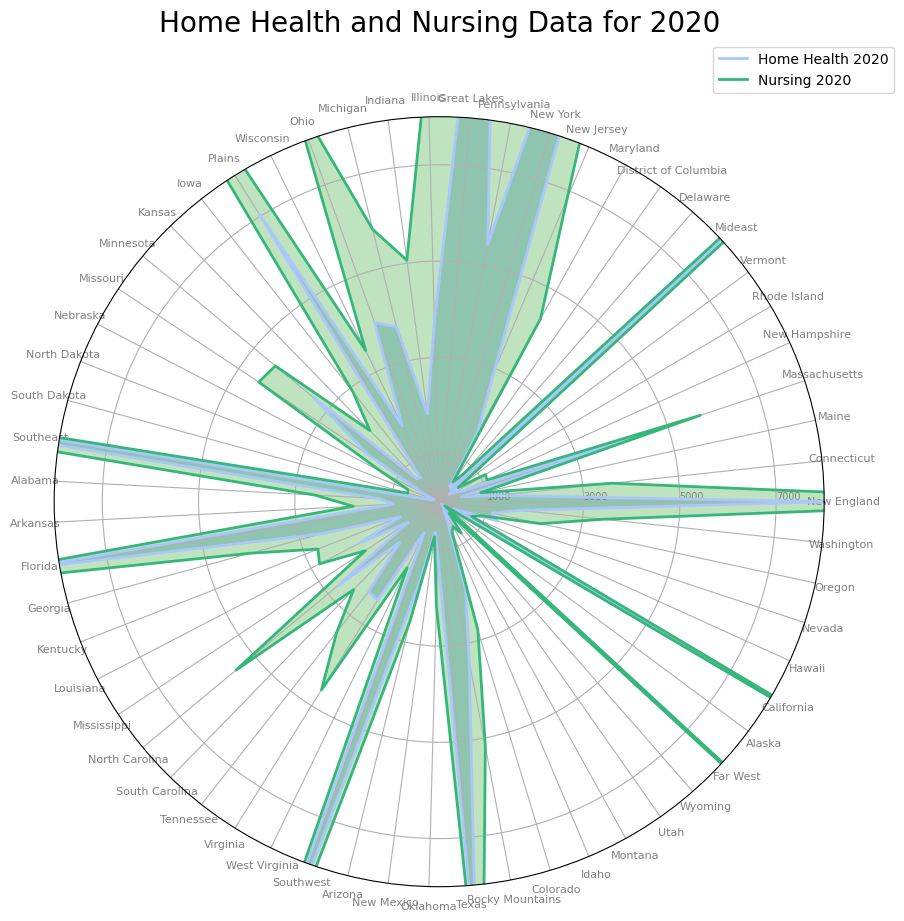

In [33]:
from math import pi
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = 'C:/Users/brian/Downloads/SQL.csv'
data = pd.read_csv(file_path)

# Prepare data for radar chart (example for 2020)
categories = data['Region/state of residence']
n_categories = len(categories)

home_health_2020 = data['HomeHealth_2020'].values
nursing_2020 = data['Nursing_2020'].values

# Add the first value to the end to close the circle
home_health_2020 = np.append(home_health_2020, home_health_2020[0])
nursing_2020 = np.append(nursing_2020, nursing_2020[0])

# Compute angle for each category
angles = [n / float(n_categories) * 2 * pi for n in range(n_categories)]
angles += angles[:1]

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Draw one axe per category and add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1000, 3000, 5000, 7000], ["1000", "3000", "5000", "7000"], color="grey", size=7)
plt.ylim(0, 8000)

# Plot data
ax.plot(angles, home_health_2020, linewidth=2, linestyle='solid', label='Home Health 2020', color=sns.color_palette('coolwarm', 2)[0])
ax.fill(angles, home_health_2020, sns.color_palette('coolwarm', 2)[0], alpha=0.3)

ax.plot(angles, nursing_2020, linewidth=2, linestyle='solid', label='Nursing 2020', color=sns.color_palette('viridis', 2)[1])
ax.fill(angles, nursing_2020, sns.color_palette('viridis', 2)[1], alpha=0.3)

# Add a title
plt.title('Home Health and Nursing Data for 2020', size=20, color='black', y=1.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()